<h1 style="text-align: center;"><u>Extracting Tables from a PDF File</u></h1>
<h2 style="text-align: center;">Augusta, Georgia</h2>
<h3 style="text-align: center;">Fiscal Year 2022</h3>
<h3 style="text-align: center;">Adopted Budget Summary By Fund</h3>
<h5 style="text-align: center;">For Years 2019 - 2022</h5>
<h5 style="text-align: center;">As of 11/16/2021</h5>

## Table of Contents
1. [Introduction](#introduction)
2. [Installing Required Libraries](#libraries)
   
   - [PyPDF](#pypdf)
   - [Camelot](#camelot)
      - [Ghostscript](#camelot)
      - [Tkinter](#camelot)
   - [Matplotlib](#matplotlib)
   - [Pandas](#pandas)
   - [NumPy](#numpy)
3. [Table Extraction](#extraction)
4. [Create a Pandas Dataframe](#dataframe)
5.  [Data Cleaning](#cleaning)
6.  [Data Validation](#validation)
7.  [Data Export](#export)

###### Note: This notebook was created using Python version 3.11.8

In [1]:
import platform
print(platform.python_version())

3.11.8


## <div id='introduction'/> 1. Introduction

The purpose of this notebook is to extract the Budget Summary tables from the Augusta, Georgia fiscal year 2022 adopted city budget PDF file.

## <div id='libraries'/>2. Installing Required Libraries

This section covers the libraries and dependencies required to run the notebook.

##### <div id='pypdf'/>**PyPDF2**

[PyPDF2](https://pypdf2.readthedocs.io/en/3.0.0/) is a free and open source pure-python PDF library capable of splitting, merging, cropping, and transforming the pages of PDF files. It can also add custom data, viewing options, and passwords to PDF files. PyPDF2 can retrieve text and metadata from PDFs as well.

- `pip install PyPDF2<3.0`

###### Note: pdffilereader is deprecated and was removed in pypdf2 3.0.0. To address this issue, install a compatible version of PyPDF2. This can be done by including "<3.0" in `pip install PyPDF2` as shown above.

In [2]:
import PyPDF2
print("PyPDF2==" + PyPDF2.__version__)

PyPDF2==2.12.1


##### <div id='camelot'/>**Camelot**
[Camelot](https://camelot-py.readthedocs.io/en/master/) is a Python library for extracting tables from PDFs.

The following [dependencies](https://camelot-py.readthedocs.io/en/master/user/install-deps.html#install-deps) must be installed for the Camelot library to work properly:

  - <b>Ghostscript</b>
  - <b>Tkinter</b>

Install the above required dependencies and then [install Camelot](https://camelot-py.readthedocs.io/en/master/user/install.html#install).

- `pip install camelot-py[cv]`
- `pip install camelot-py[plot]`

##### <div id='matplotlib'/> **Matplotlib**

Visual debugging using plot() requires [Matplotlib](https://matplotlib.org/) which is an optional dependency.

- `pip install matplotlib`

##### <div id='pandas'/>**Pandas**

[Pandas](https://pandas.pydata.org/) is a Python library for data manipulation and analysis.

- `pip install pandas`

##### <div id='numpy'/>**NumPy**

[NumPy](https://numpy.org/) is a Python library used for scientific computing.

- `pip install numpy`

##### Import Libraries

In [3]:
import camelot
import tkinter
import matplotlib
import pandas as pd
import numpy as np

## <div id='extraction'/> 3. Table Extraction

###### Note: Summary tables in Adopted Budget PDF file are image-based, camelot only works on text-based pages. However, figures in the adopted and proposed budgets are identical. Therefore, the following tables are extracted from the FY2022 proposed budget.

In [4]:
file = "PDF_FY2022_Proposed_Budget.pdf"
tables = camelot.read_pdf(file, pages='27-29')
print("Total tables extracted:", tables.n)

Total tables extracted: 2


##### Visual Debugging

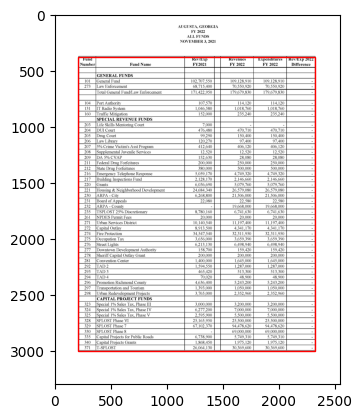

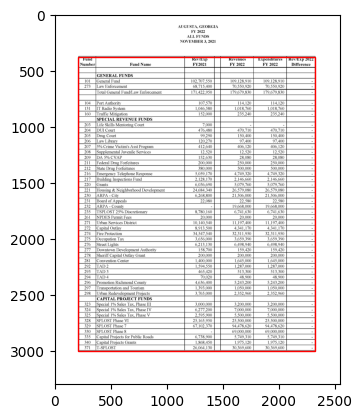

In [5]:
camelot.plot(tables[0], kind='contour')

##### Parsing Report

In [6]:
# Print table parsing reports
for table in tables:
    print(table.parsing_report)

{'accuracy': 100.0, 'whitespace': 21.83, 'order': 1, 'page': 28}
{'accuracy': 100.0, 'whitespace': 26.95, 'order': 1, 'page': 29}


##### Dimensions

In [7]:
# Print number of table rows and columns
for table in tables:
    print(table)

<Table shape=(53, 7)>
<Table shape=(44, 7)>


## <div id='dataframe'/>4. Create a Pandas Dataframe

In [8]:
dfs = []  # list to store dataframes
for table in tables:
    df = table.df # Convert tables to dataframes
    df.columns = df.columns.astype(str) # Convert column names to string
    
    # Rename columns
    df.columns.values[0] = 'fund_number'
    df.columns.values[1] = 'fund_name'
    df.columns.values[2] = '2021_rev_exp'
    df.columns.values[3] = 'blank'
    df.columns.values[4] = '2022_revenues'
    df.columns.values[5] = '2022_expenditures'
    df.drop(columns=df.columns[6], inplace=True) # Drop last column
    dfs.append(df)

df = pd.concat(dfs, axis=0)  # concatenate all dataframes in list 
df = df.reset_index(drop=True) # Reset index
df.replace(r'', np.nan, regex=True, inplace=True) # Fill missing values with NaN

In [9]:
df.head()

,fund_number,fund_name,2021_rev_exp,blank,2022_revenues,2022_expenditures
0,Fund\nNumber,Fund Name,Rev/Exp\nFY2021,NaN,Revenues\nFY 2022,Expenditures\nFY 2022
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,GENERAL FUNDS,NaN,NaN,NaN,NaN


## <div id='cleaning'/> 5. Data Cleaning

In [11]:
df = df[(df.fund_number != 'Fund\nNumber') & (df.fund_name != 'TOTAL')] # Drop header and TOTAL rows
df.drop(columns=df.columns[3], inplace=True) # Drop blank column
df = df.dropna(subset=['fund_name'], ignore_index=True) # Drop rows with NaN values in 'fund_name' column from dataframe


In [12]:
df.head(10)

,fund_number,fund_name,2021_rev_exp,2022_revenues,2022_expenditures
0,NaN,GENERAL FUNDS,NaN,NaN,NaN
1,101,General Fund,"102,707,550","109,128,910","109,128,910"
2,273,Law Enforcement,"68,715,400","70,550,920","70,550,920"
3,NaN,Total General Fund/Law Enforcement,"171,422,950","179,679,830","179,679,830"
4,104,Port Authority,"107,570","114,120","114,120"
5,131,IT Radio System,"1,046,580","1,018,760","1,018,760"
6,160,Traffic Mitigation,"152,000","235,240","235,240"
7,NaN,SPECIAL REVENUE FUNDS,NaN,NaN,NaN
8,203,Life Skills Mentoring Court,"7,000",-,-
9,204,DUI Court,"476,480","470,710","470,710"


##### Correct Fund Name Mispelling

In [13]:
df['fund_name'].replace('URA Foundry Projecct', 'URA Foundry Project', inplace=True)

##### Add a fund category column

In [14]:
# Create a list of fund categories
fund_categories = ['GENERAL FUNDS', 'SPECIAL REVENUE FUNDS',
                   'CAPITAL PROJECT FUNDS', 'DEBT SERVICE FUNDS',
                   'INTERNAL SERVICE FUNDS', 'ENTERPRISE FUNDS',
                   'TRUST & AGENCY FUNDS']

# Add a 'fund_category' column 
df['fund_category'] = np.nan

# Assign fund categories to column rows
df.fund_category[1:7] = fund_categories[0]
df.fund_category[8:40] = fund_categories[1]
df.fund_category[41:50] = fund_categories[2]
df.fund_category[51:53] = fund_categories[3]
df.fund_category[54:73] = fund_categories[4]
df.fund_category[74:81] = fund_categories[5]
df.fund_category[82:89] = fund_categories[6]

# Drop remaining rows with NaN values from dataframe
df = df.dropna(ignore_index=True)

C:\Users\tivon\AppData\Local\Temp\ipykernel_37404\472498172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fund_category[1:7] = fund_categories[0]
C:\Users\tivon\AppData\Local\Temp\ipykernel_37404\472498172.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'GENERAL FUNDS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fund_category[1:7] = fund_categories[0]


In [15]:
df.head(10)

,fund_number,fund_name,2021_rev_exp,2022_revenues,2022_expenditures,fund_category
0,101,General Fund,"102,707,550","109,128,910","109,128,910",GENERAL FUNDS
1,273,Law Enforcement,"68,715,400","70,550,920","70,550,920",GENERAL FUNDS
2,104,Port Authority,"107,570","114,120","114,120",GENERAL FUNDS
3,131,IT Radio System,"1,046,580","1,018,760","1,018,760",GENERAL FUNDS
4,160,Traffic Mitigation,"152,000","235,240","235,240",GENERAL FUNDS
5,203,Life Skills Mentoring Court,"7,000",-,-,SPECIAL REVENUE FUNDS
6,204,DUI Court,"476,480","470,710","470,710",SPECIAL REVENUE FUNDS
7,205,Drug Court,"99,290","150,400","150,400",SPECIAL REVENUE FUNDS
8,206,Law Library,"120,270","97,400","97,400",SPECIAL REVENUE FUNDS
9,207,5% Crime Victim's Asst Program,"412,640","406,120","406,120",SPECIAL REVENUE FUNDS


##### Reorder Column Headers

In [16]:
df.insert(2, 'fund_category', df.pop('fund_category')) # Move fund category column to index position 2

In [17]:
df.head()

,fund_number,fund_name,fund_category,2021_rev_exp,2022_revenues,2022_expenditures
0,101,General Fund,GENERAL FUNDS,"102,707,550","109,128,910","109,128,910"
1,273,Law Enforcement,GENERAL FUNDS,"68,715,400","70,550,920","70,550,920"
2,104,Port Authority,GENERAL FUNDS,"107,570","114,120","114,120"
3,131,IT Radio System,GENERAL FUNDS,"1,046,580","1,018,760","1,018,760"
4,160,Traffic Mitigation,GENERAL FUNDS,"152,000","235,240","235,240"


##### Add Report Date Column

In [18]:
df['report_date'] = pd.Timestamp('2021-11-16').strftime('%Y-%m-%d') # Add Report Date column

In [19]:
df.head()

,fund_number,fund_name,fund_category,2021_rev_exp,2022_revenues,2022_expenditures,report_date
0,101,General Fund,GENERAL FUNDS,"102,707,550","109,128,910","109,128,910",2021-11-16
1,273,Law Enforcement,GENERAL FUNDS,"68,715,400","70,550,920","70,550,920",2021-11-16
2,104,Port Authority,GENERAL FUNDS,"107,570","114,120","114,120",2021-11-16
3,131,IT Radio System,GENERAL FUNDS,"1,046,580","1,018,760","1,018,760",2021-11-16
4,160,Traffic Mitigation,GENERAL FUNDS,"152,000","235,240","235,240",2021-11-16


##### Change Data Types

In [20]:
df.dtypes # Check data types

fund_number          object
fund_name            object
fund_category        object
2021_rev_exp         object
2022_revenues        object
2022_expenditures    object
report_date          object
dtype: object

In [21]:
# Replace '-' with 0
df.replace('-', '0', inplace=True)

# Remove commas from numerical values
df['2021_rev_exp'] = df['2021_rev_exp'].str.replace(',', '')
df['2022_revenues'] = df['2022_revenues'].str.replace(',', '')
df['2022_expenditures'] = df['2022_expenditures'].str.replace(',', '')

# Change data types
df.fund_number = df.fund_number.astype(int)
df.fund_name = df.fund_name.astype(str)
df['fund_category'] = pd.Categorical(df.fund_category)
df['2021_rev_exp'] = df['2021_rev_exp'].astype(int)
df['2022_revenues'] = df['2022_revenues'].astype(int)
df['2022_expenditures'] = df['2022_expenditures'].astype(int)

In [22]:
df.head()

,fund_number,fund_name,fund_category,2021_rev_exp,2022_revenues,2022_expenditures,report_date
0,101,General Fund,GENERAL FUNDS,102707550,109128910,109128910,2021-11-16
1,273,Law Enforcement,GENERAL FUNDS,68715400,70550920,70550920,2021-11-16
2,104,Port Authority,GENERAL FUNDS,107570,114120,114120,2021-11-16
3,131,IT Radio System,GENERAL FUNDS,1046580,1018760,1018760,2021-11-16
4,160,Traffic Mitigation,GENERAL FUNDS,152000,235240,235240,2021-11-16


## <div id='export'/> 7. Data Export

In [24]:
df.to_csv('Adopted_Budget_Summary_by_Fund_FY2022.csv', index=False)